In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as ImbPipeline

In [39]:
df = pd.read_csv('new_train2.csv')

In [40]:
# Preprocess
df['label'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
del df['y']

X = df.drop('label', axis=1)
y = df['label']

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'duration', 'campaign']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)  # Set sparse_output=False
    ])

In [41]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
def train_evaluate_plot_model(model, name, strategy_name, resampling=None):
    steps = [('preprocessor', preprocessor)]
    if resampling:
        steps.append(('resampling', resampling))
    steps.append(('classifier', model))
    pipeline = ImbPipeline(steps=steps)

    # Training 
    pipeline.fit(X_train, y_train)
    
    # Testing
    y_pred = pipeline.predict(X_test)
    print(f"Test Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
    
    # Classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix: {name} with {strategy_name}')
    plt.show()

    # ROC curve
    probas_ = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} ROC (AUC = {roc_auc:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name} with {strategy_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Precision Recall curve
    precision, recall, _ = precision_recall_curve(y_test, probas_)
    
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.', label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name} with {strategy_name}')
    plt.legend()
    plt.show()

## No Sampling

### Logistic Regression

Test Accuracy for Logistic Regression: 0.9013
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8768
           1       0.61      0.34      0.44      1119

    accuracy                           0.90      9887
   macro avg       0.77      0.66      0.69      9887
weighted avg       0.89      0.90      0.89      9887



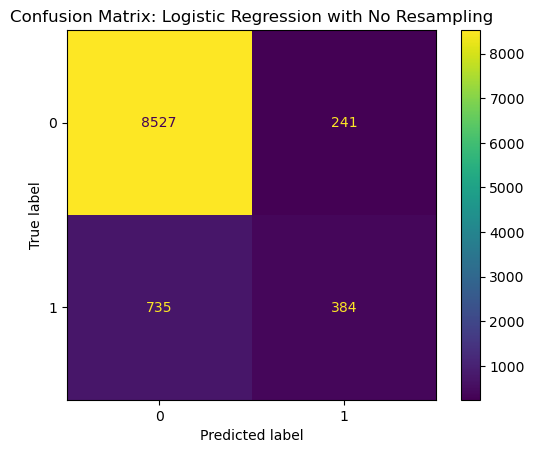

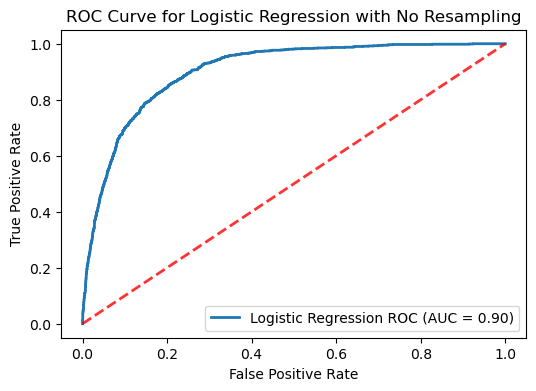

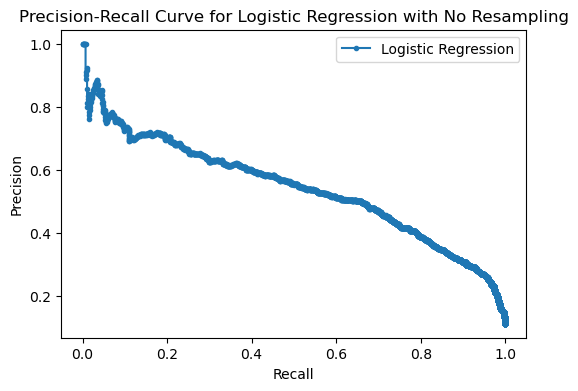

In [43]:
strategy_name = "No Resampling"
model = LogisticRegression(solver='liblinear', max_iter=1000)
name = "Logistic Regression"

train_evaluate_plot_model(model, name, strategy_name)

### KNN

Test Accuracy for KNN: 0.8918
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8768
           1       0.55      0.26      0.35      1119

    accuracy                           0.89      9887
   macro avg       0.73      0.61      0.65      9887
weighted avg       0.87      0.89      0.87      9887



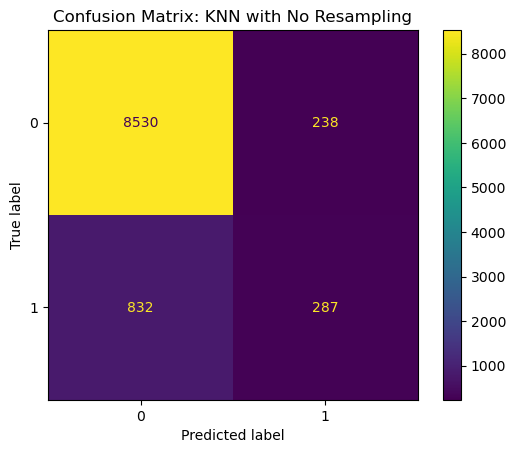

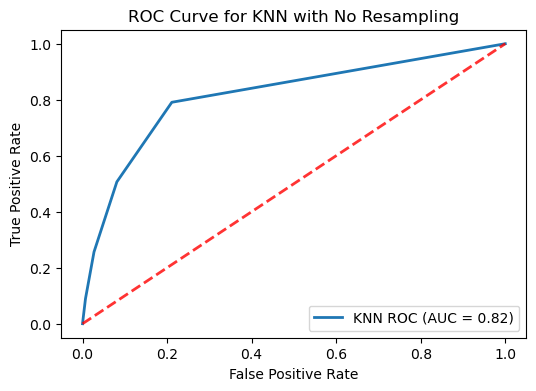

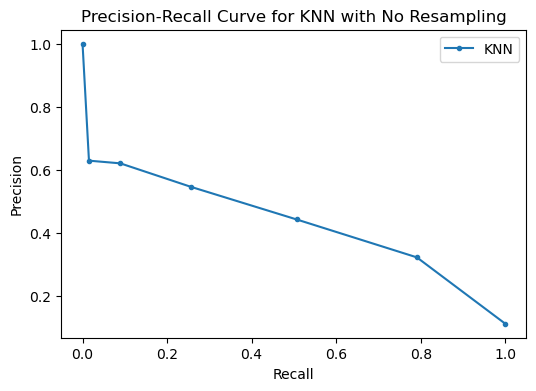

In [44]:
strategy_name = "No Resampling"
model = KNeighborsClassifier()
name = "KNN"

train_evaluate_plot_model(model, name, strategy_name)

### Naive Bayes

Test Accuracy for Naive Bayes: 0.8035
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      8768
           1       0.32      0.66      0.43      1119

    accuracy                           0.80      9887
   macro avg       0.64      0.74      0.66      9887
weighted avg       0.88      0.80      0.83      9887



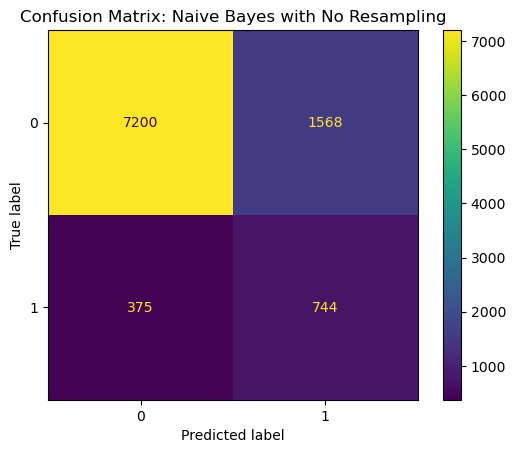

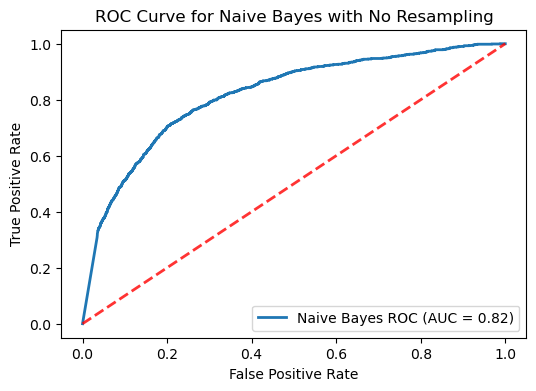

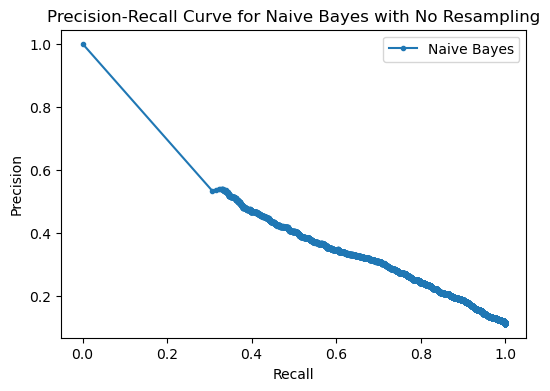

In [45]:
strategy_name = "No Resampling"
model = GaussianNB()
name = "Naive Bayes"

train_evaluate_plot_model(model, name, strategy_name)

### Decision Tree

Test Accuracy for Decision Tree: 0.8743
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8768
           1       0.45      0.48      0.46      1119

    accuracy                           0.87      9887
   macro avg       0.69      0.70      0.70      9887
weighted avg       0.88      0.87      0.88      9887



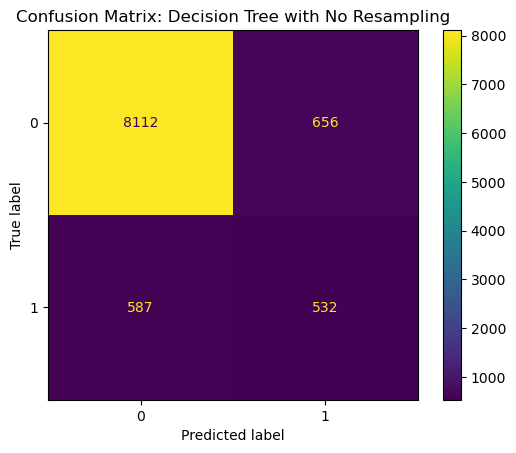

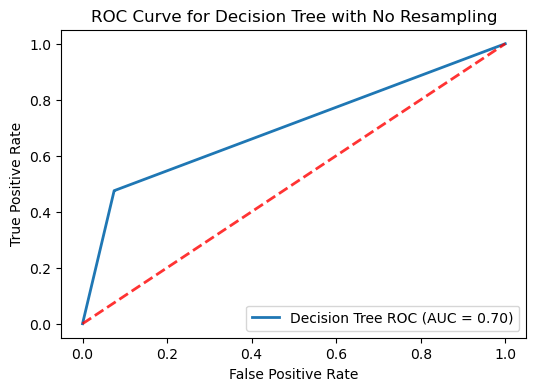

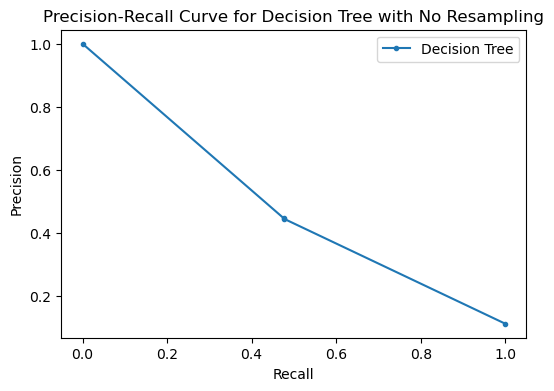

In [46]:
strategy_name = "No Resampling"
model = DecisionTreeClassifier()
name = "Decision Tree"

train_evaluate_plot_model(model, name, strategy_name)

### Random Forest

Test Accuracy for Random Forest: 0.9028
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8768
           1       0.61      0.38      0.47      1119

    accuracy                           0.90      9887
   macro avg       0.77      0.67      0.71      9887
weighted avg       0.89      0.90      0.89      9887



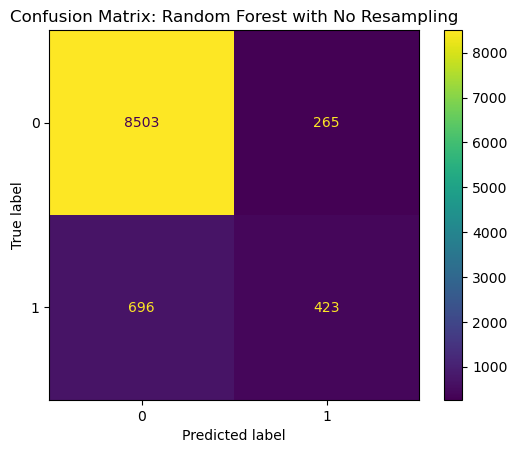

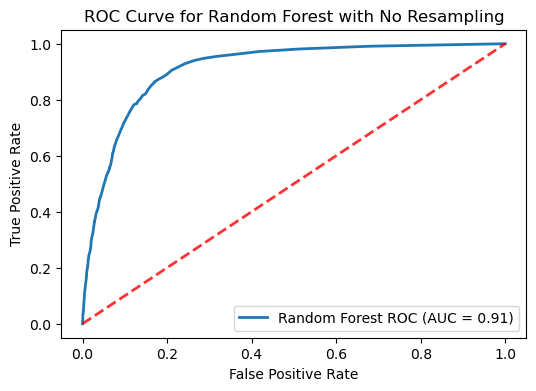

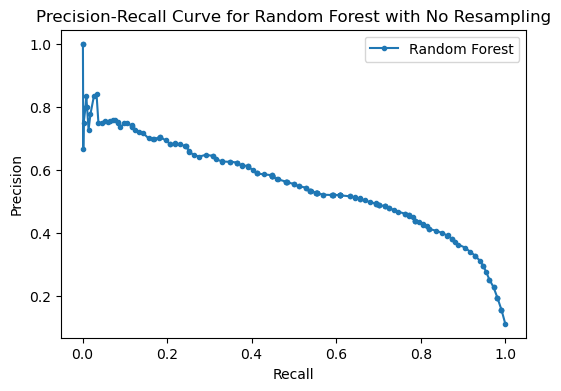

In [47]:
strategy_name = "No Resampling"
model = RandomForestClassifier()
name = "Random Forest"

train_evaluate_plot_model(model, name, strategy_name)

### SVM

Test Accuracy for SVM: 0.9032
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8768
           1       0.70      0.25      0.37      1119

    accuracy                           0.90      9887
   macro avg       0.81      0.62      0.66      9887
weighted avg       0.89      0.90      0.88      9887



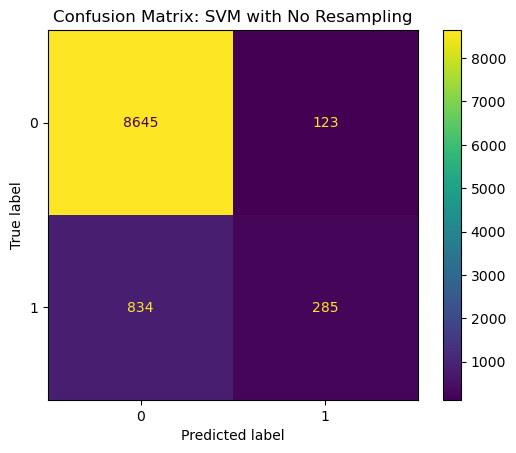

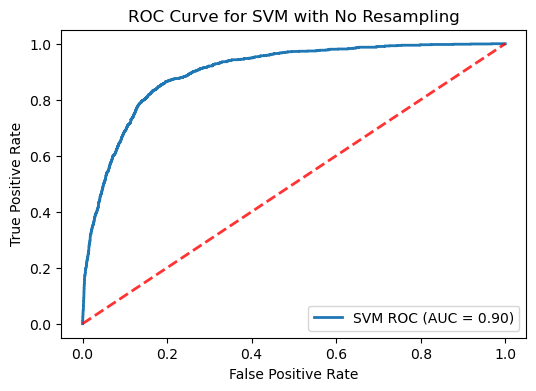

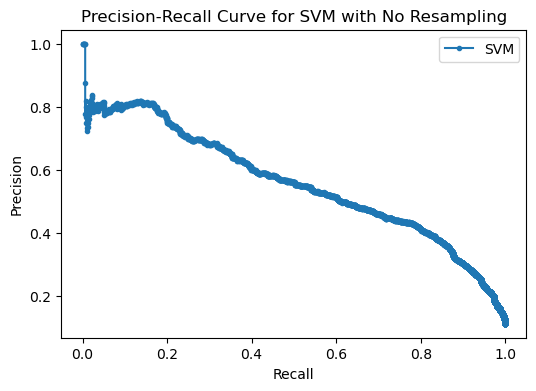

In [48]:
strategy_name = "No Resampling"
model = SVC(probability=True)
name = "SVM"

train_evaluate_plot_model(model, name, strategy_name)

### Linear Discriminant Analysis

Test Accuracy for Linear Discriminant Analysis: 0.9019
Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8768
           1       0.61      0.38      0.46      1119

    accuracy                           0.90      9887
   macro avg       0.77      0.67      0.71      9887
weighted avg       0.89      0.90      0.89      9887



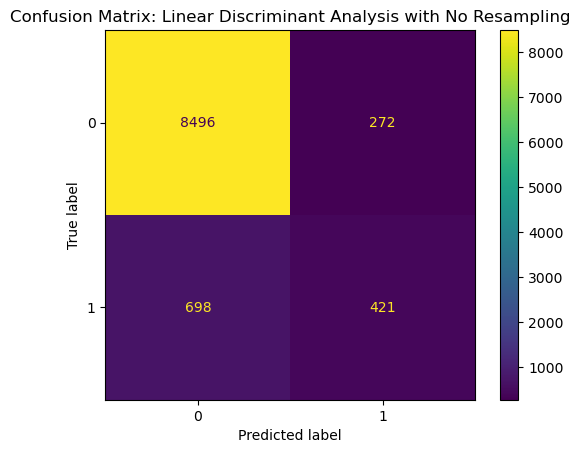

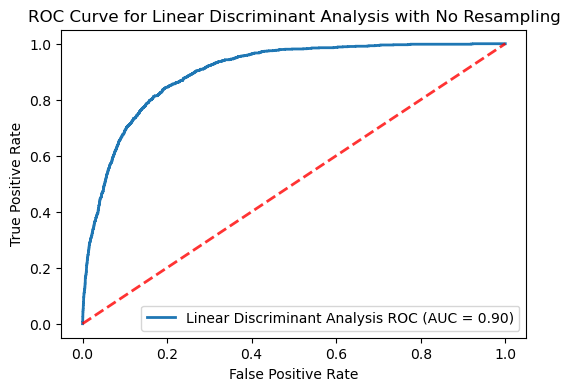

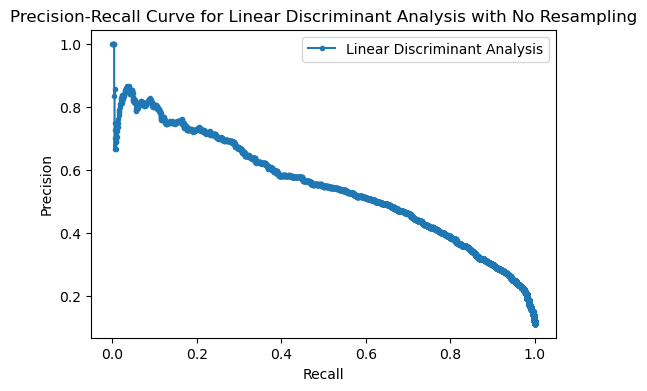

In [49]:
strategy_name = "No Resampling"
model = LinearDiscriminantAnalysis()
name = "Linear Discriminant Analysis"

train_evaluate_plot_model(model, name, strategy_name)

## Over Sampling

### Logistic Regresssion

Test Accuracy for Logistic Regression: 0.8168
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      8768
           1       0.36      0.83      0.51      1119

    accuracy                           0.82      9887
   macro avg       0.67      0.82      0.70      9887
weighted avg       0.91      0.82      0.84      9887



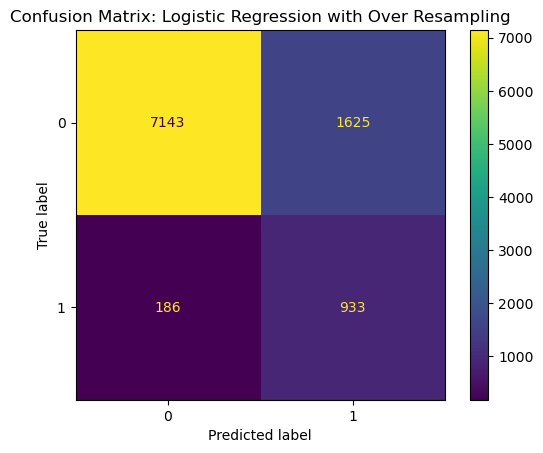

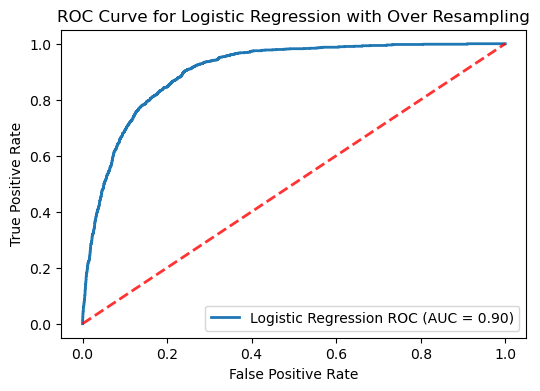

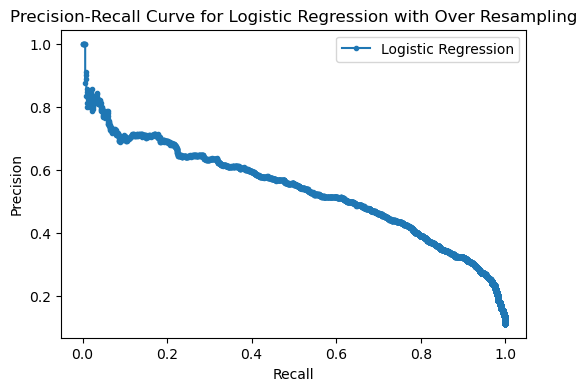

In [50]:
strategy_name = "Over Resampling"
model = LogisticRegression(solver='liblinear', max_iter=1000)
name = "Logistic Regression"

train_evaluate_plot_model(model, name, strategy_name, RandomOverSampler(random_state=42))

### KNN

Test Accuracy for KNN: 0.8289
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      8768
           1       0.36      0.64      0.46      1119

    accuracy                           0.83      9887
   macro avg       0.65      0.75      0.68      9887
weighted avg       0.88      0.83      0.85      9887



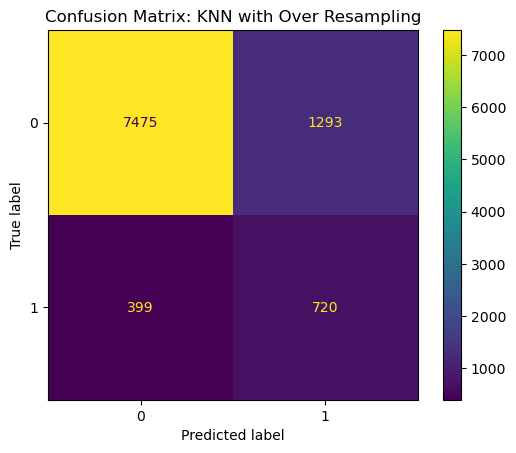

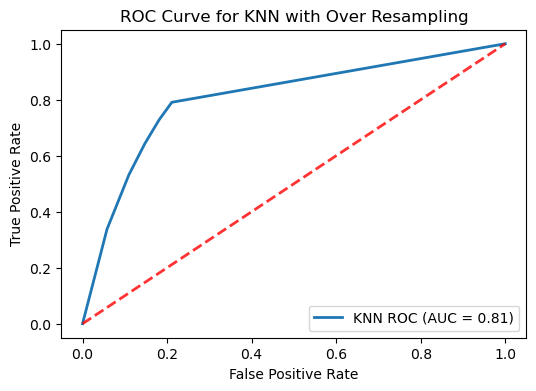

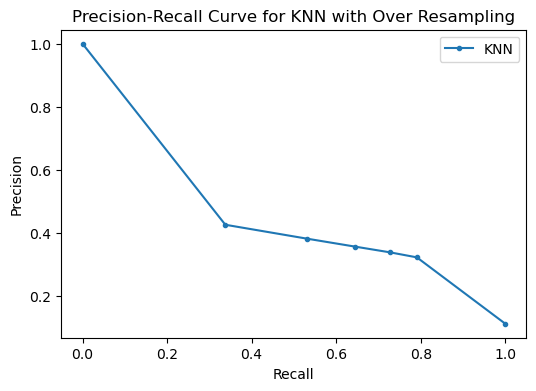

In [51]:
strategy_name = "Over Resampling"
model = KNeighborsClassifier()
name = "KNN"

train_evaluate_plot_model(model, name, strategy_name, RandomOverSampler(random_state=42))

### Naive Bayes

Test Accuracy for Naive Bayes: 0.7262
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      8768
           1       0.26      0.78      0.39      1119

    accuracy                           0.73      9887
   macro avg       0.61      0.75      0.61      9887
weighted avg       0.88      0.73      0.77      9887



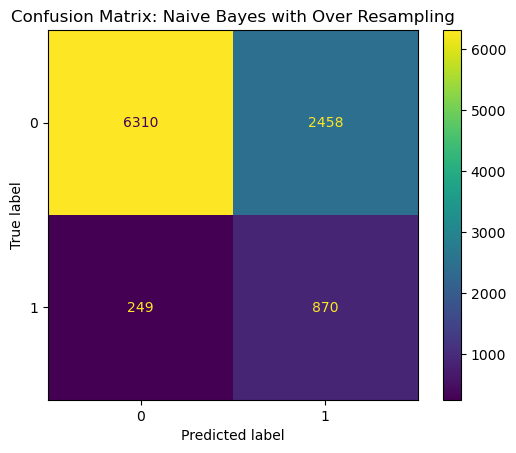

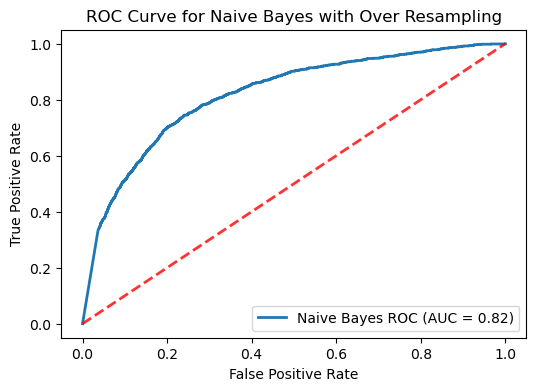

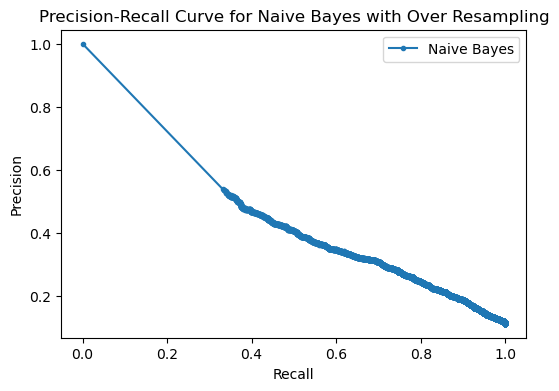

In [52]:
strategy_name = "Over Resampling"
model = GaussianNB()
name = "Naive Bayes"

train_evaluate_plot_model(model, name, strategy_name, RandomOverSampler(random_state=42))

### Decision Tree

Test Accuracy for Decision Tree: 0.8747
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8768
           1       0.45      0.44      0.44      1119

    accuracy                           0.87      9887
   macro avg       0.69      0.69      0.69      9887
weighted avg       0.87      0.87      0.87      9887



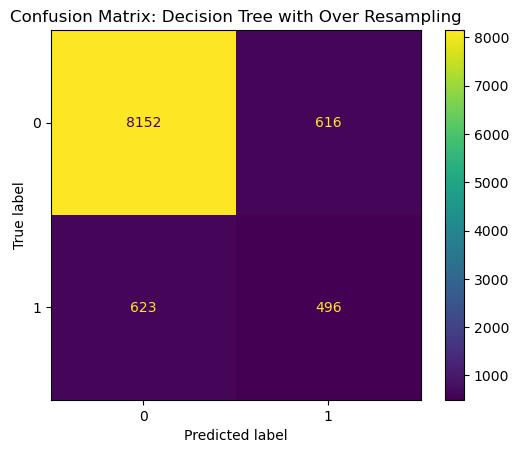

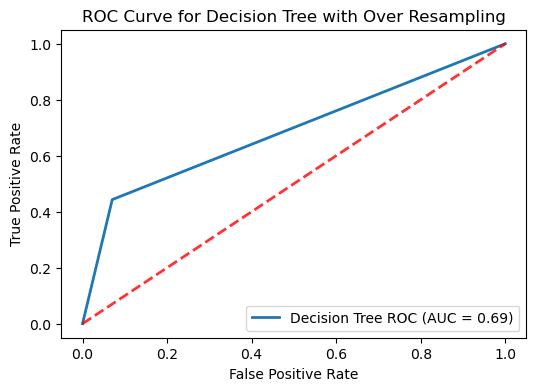

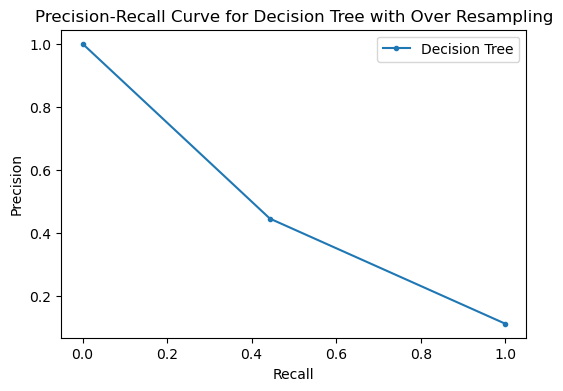

In [53]:
strategy_name = "Over Resampling"
model = DecisionTreeClassifier()
name = "Decision Tree"

train_evaluate_plot_model(model, name, strategy_name, RandomOverSampler(random_state=42))

### Random Forest

Test Accuracy for Random Forest: 0.8973
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8768
           1       0.55      0.50      0.53      1119

    accuracy                           0.90      9887
   macro avg       0.74      0.73      0.73      9887
weighted avg       0.89      0.90      0.90      9887



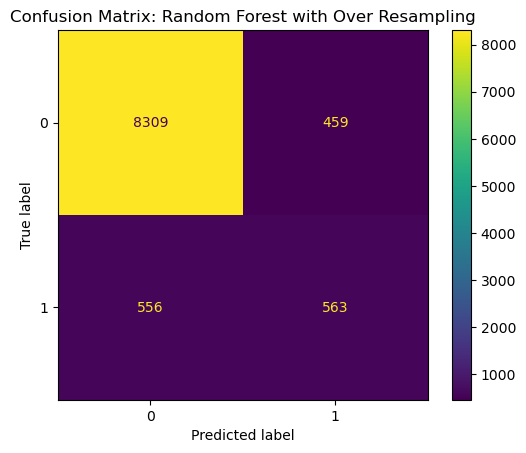

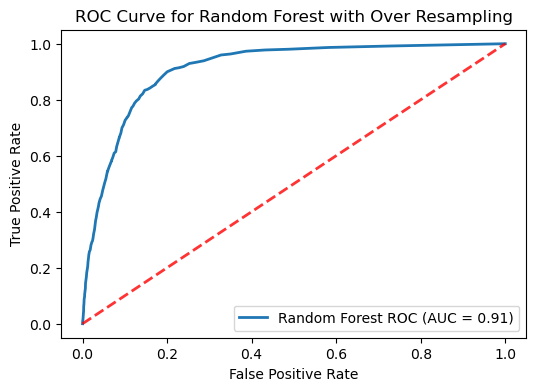

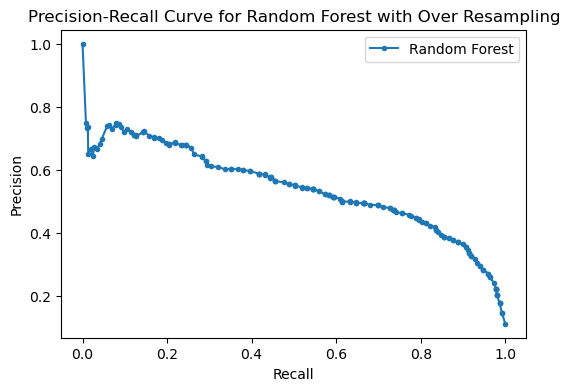

In [54]:
strategy_name = "Over Resampling"
model = RandomForestClassifier()
name = "Random Forest"

train_evaluate_plot_model(model, name, strategy_name, RandomOverSampler(random_state=42))

### SVM

Test Accuracy for SVM: 0.8405
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8768
           1       0.40      0.85      0.55      1119

    accuracy                           0.84      9887
   macro avg       0.69      0.84      0.72      9887
weighted avg       0.91      0.84      0.86      9887



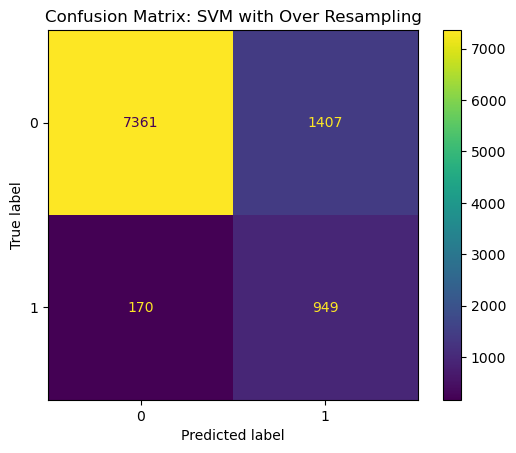

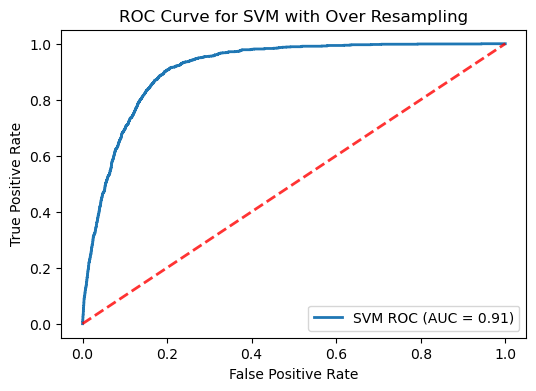

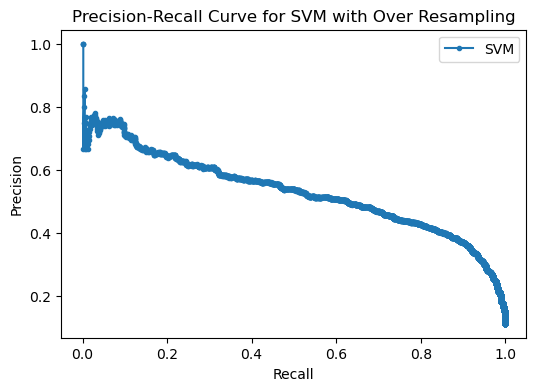

In [55]:
strategy_name = "Over Resampling"
model = SVC(probability=True)
name = "SVM"

train_evaluate_plot_model(model, name, strategy_name, RandomOverSampler(random_state=42))

### Linear Discriminant Analysis

Test Accuracy for Linear Discriminant Analysis: 0.8136
Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      8768
           1       0.36      0.83      0.50      1119

    accuracy                           0.81      9887
   macro avg       0.67      0.82      0.69      9887
weighted avg       0.90      0.81      0.84      9887



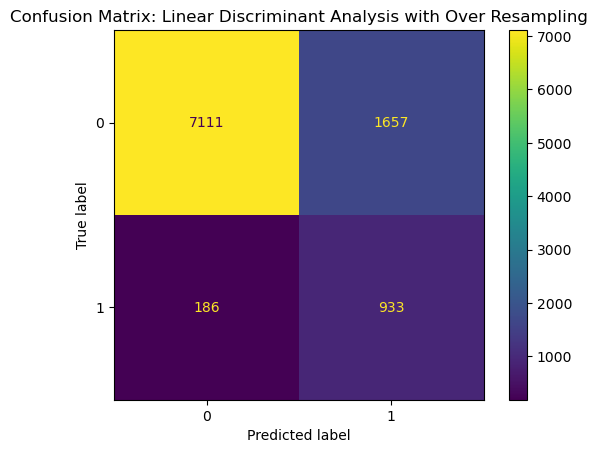

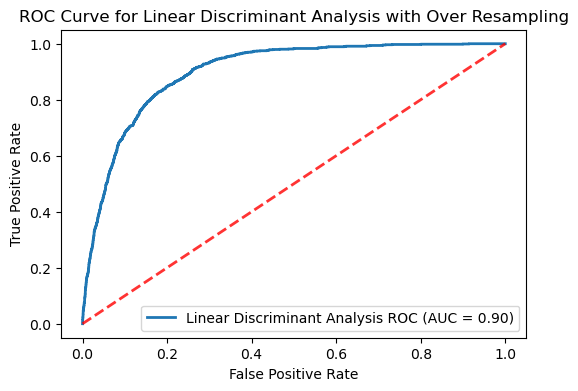

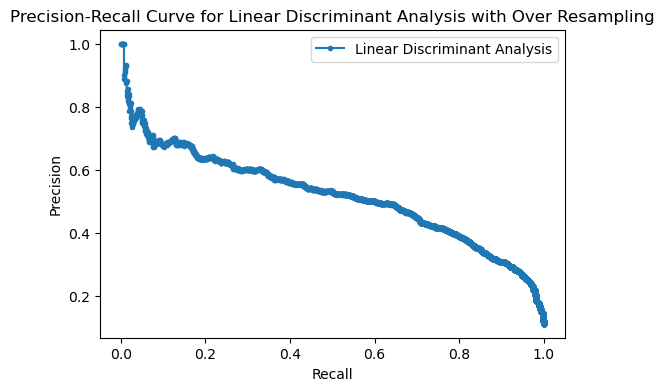

In [57]:
strategy_name = "Over Resampling"
model = LinearDiscriminantAnalysis()
name = "Linear Discriminant Analysis"

train_evaluate_plot_model(model, name, strategy_name, RandomOverSampler(random_state=42))

## Under Sampling

### Logistic Regression

Test Accuracy for Logistic Regression: 0.8156
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      8768
           1       0.36      0.83      0.51      1119

    accuracy                           0.82      9887
   macro avg       0.67      0.82      0.70      9887
weighted avg       0.90      0.82      0.84      9887



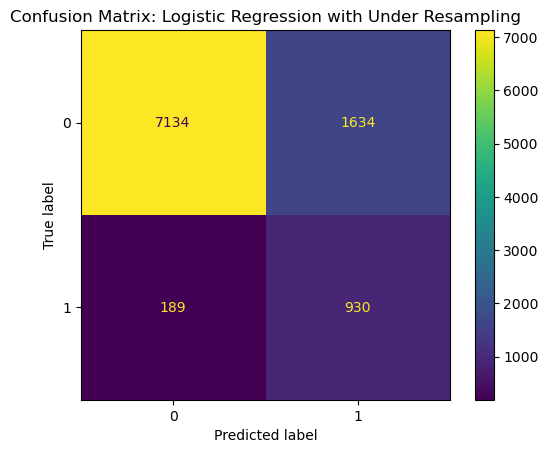

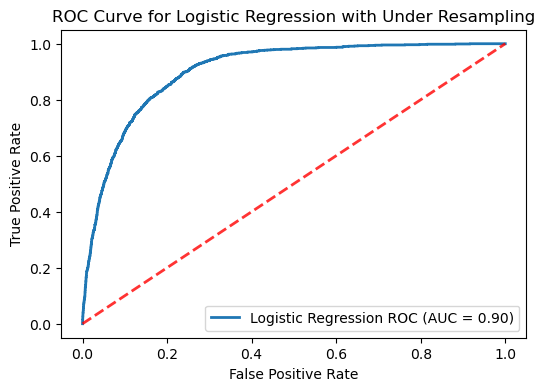

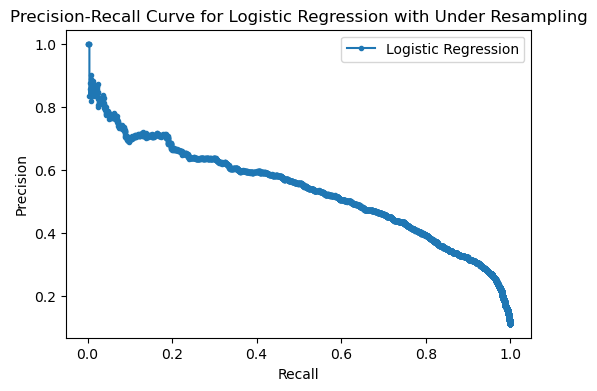

In [59]:
strategy_name = "Under Resampling"
model = LogisticRegression(solver='liblinear', max_iter=1000)
name = "Logistic Regression"

train_evaluate_plot_model(model, name, strategy_name, RandomUnderSampler(random_state=42))

### KNN

Test Accuracy for KNN: 0.8007
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8768
           1       0.34      0.84      0.49      1119

    accuracy                           0.80      9887
   macro avg       0.66      0.82      0.68      9887
weighted avg       0.90      0.80      0.83      9887



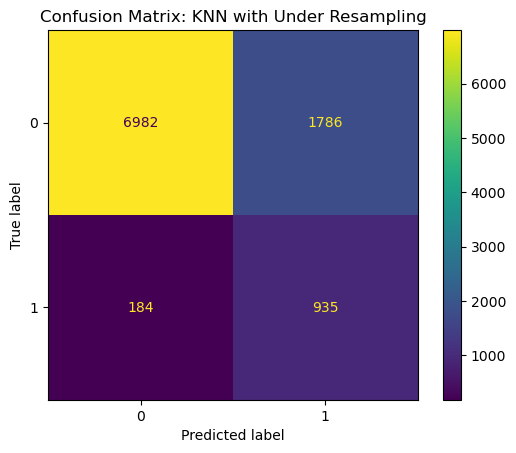

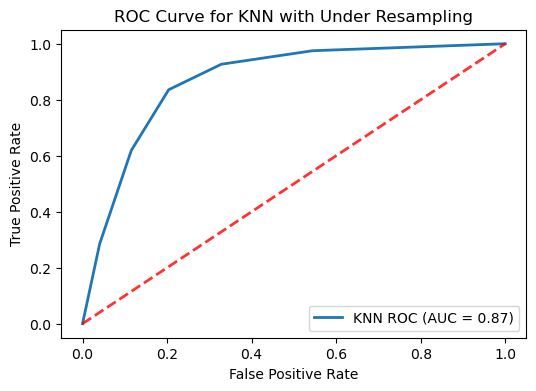

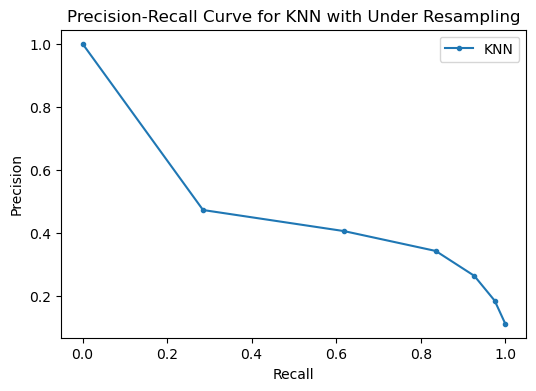

In [60]:
strategy_name = "Under Resampling"
model = KNeighborsClassifier()
name = "KNN"

train_evaluate_plot_model(model, name, strategy_name, RandomUnderSampler(random_state=42))

### Naive Bayes

Test Accuracy for Naive Bayes: 0.8793
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8768
           1       0.46      0.40      0.43      1119

    accuracy                           0.88      9887
   macro avg       0.69      0.67      0.68      9887
weighted avg       0.87      0.88      0.88      9887



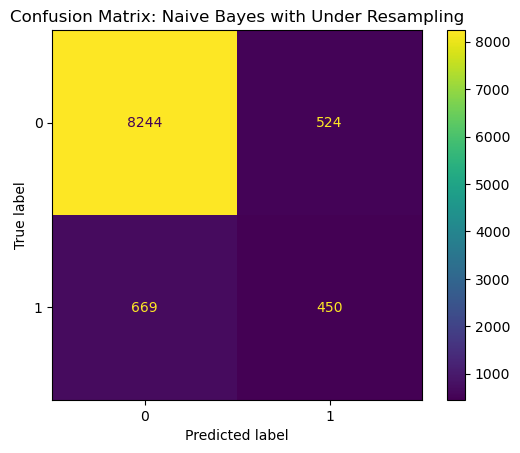

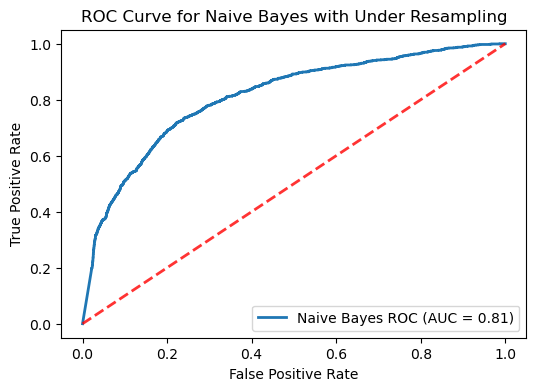

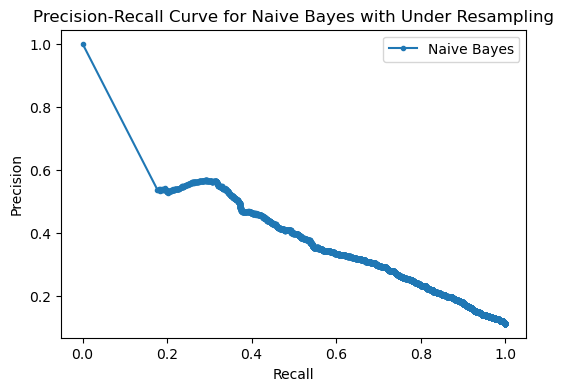

In [61]:
strategy_name = "Under Resampling"
model = GaussianNB()
name = "Naive Bayes"

train_evaluate_plot_model(model, name, strategy_name, RandomUnderSampler(random_state=42))

### Decision Tree

Test Accuracy for Decision Tree: 0.7758
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      8768
           1       0.31      0.78      0.44      1119

    accuracy                           0.78      9887
   macro avg       0.64      0.78      0.65      9887
weighted avg       0.89      0.78      0.81      9887



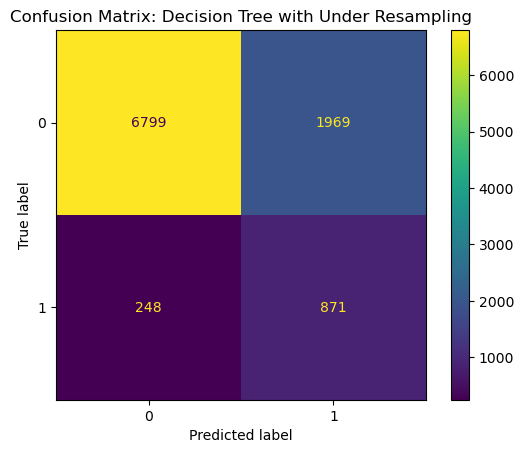

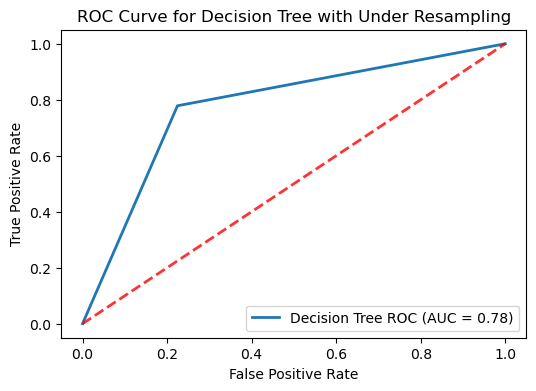

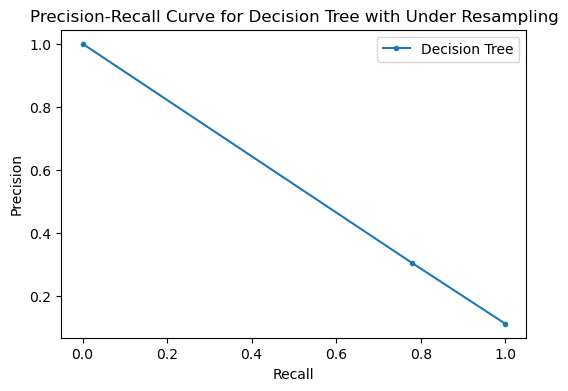

In [62]:
strategy_name = "Under Resampling"
model = DecisionTreeClassifier()
name = "Decision Tree"

train_evaluate_plot_model(model, name, strategy_name, RandomUnderSampler(random_state=42))

### Random Forest

Test Accuracy for Random Forest: 0.8266
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8768
           1       0.38      0.89      0.54      1119

    accuracy                           0.83      9887
   macro avg       0.68      0.85      0.72      9887
weighted avg       0.92      0.83      0.85      9887



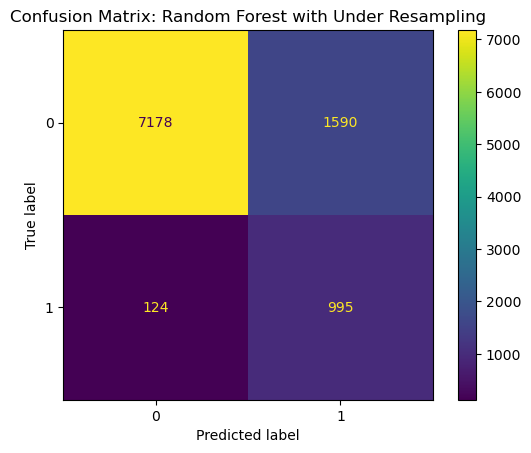

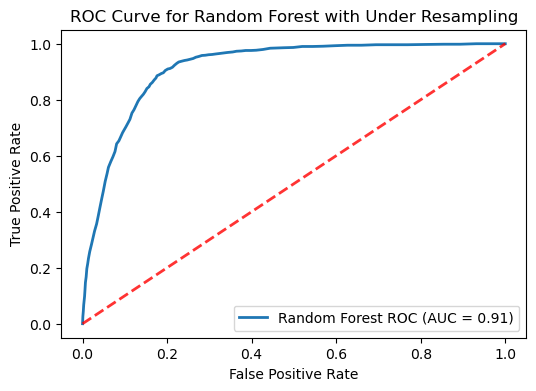

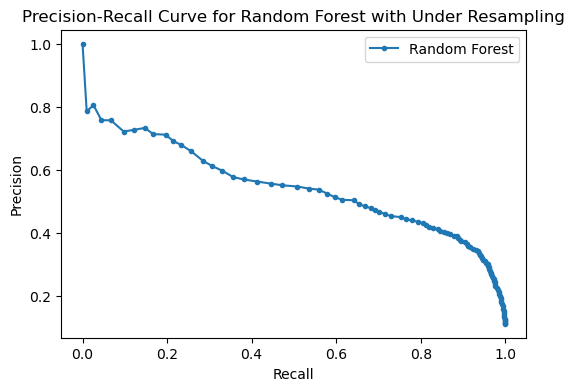

In [63]:
strategy_name = "Under Resampling"
model = RandomForestClassifier()
name = "Random Forest"

train_evaluate_plot_model(model, name, strategy_name, RandomUnderSampler(random_state=42))

### SVM

Test Accuracy for SVM: 0.8183
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8768
           1       0.37      0.89      0.53      1119

    accuracy                           0.82      9887
   macro avg       0.68      0.85      0.71      9887
weighted avg       0.91      0.82      0.85      9887



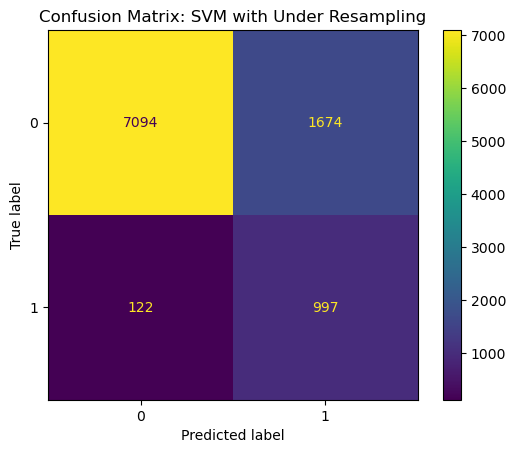

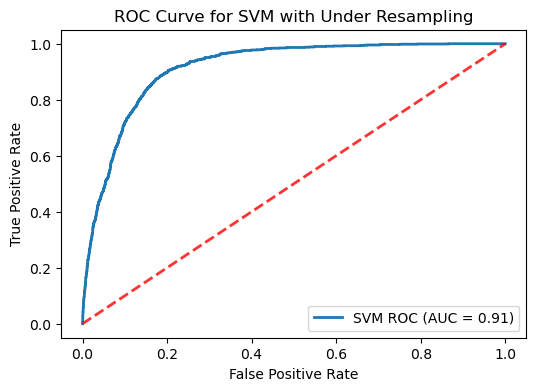

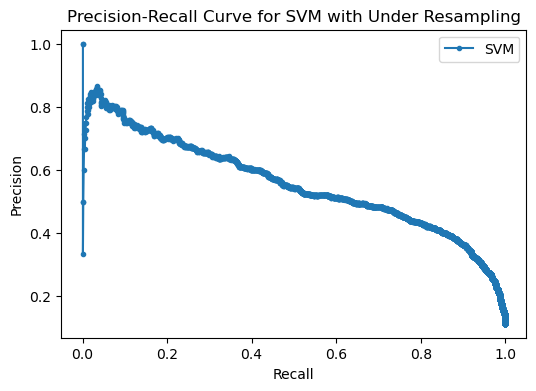

In [64]:
strategy_name = "Under Resampling"
model = SVC(probability=True)
name = "SVM"

train_evaluate_plot_model(model, name, strategy_name, RandomUnderSampler(random_state=42))

### Linear Discriminant Analysis

Test Accuracy for Linear Discriminant Analysis: 0.8127
Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8768
           1       0.36      0.83      0.50      1119

    accuracy                           0.81      9887
   macro avg       0.67      0.82      0.69      9887
weighted avg       0.90      0.81      0.84      9887



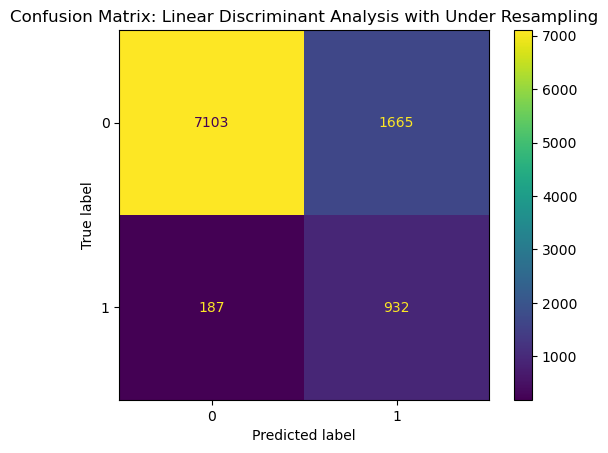

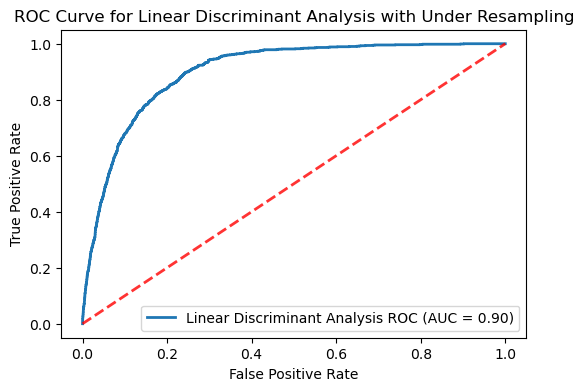

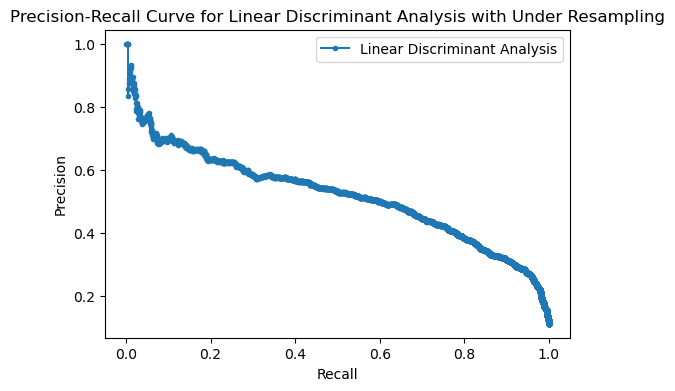

In [65]:
strategy_name = "Under Resampling"
model = LinearDiscriminantAnalysis()
name = "Linear Discriminant Analysis"

train_evaluate_plot_model(model, name, strategy_name, RandomUnderSampler(random_state=42))

## SMOTE

### Logistic Regression

Test Accuracy for Logistic Regression: 0.8213
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8768
           1       0.37      0.82      0.51      1119

    accuracy                           0.82      9887
   macro avg       0.67      0.82      0.70      9887
weighted avg       0.90      0.82      0.85      9887



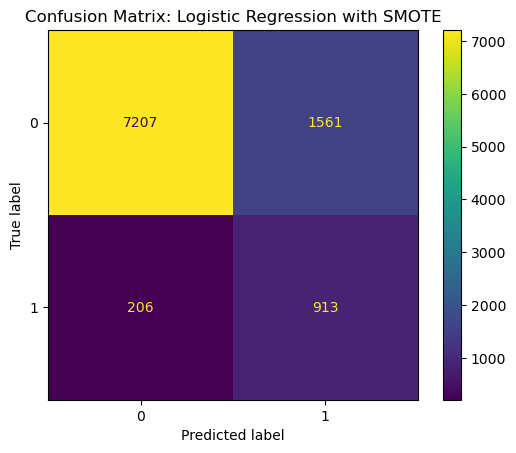

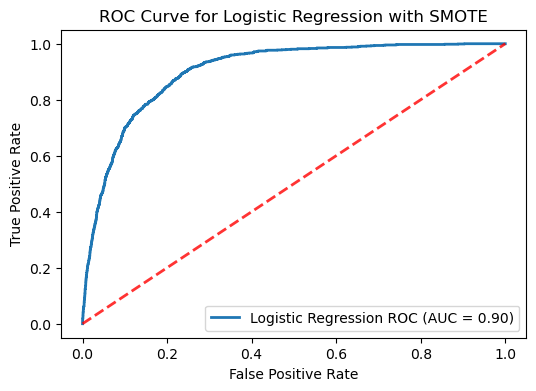

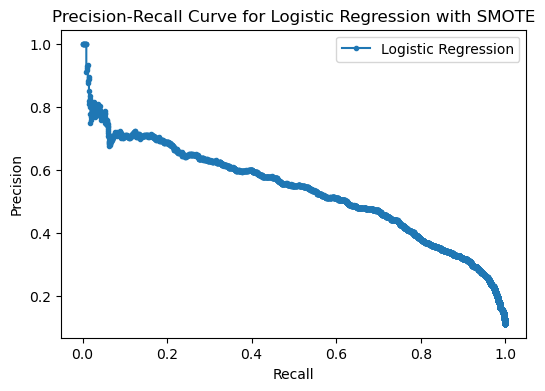

In [67]:
strategy_name = "SMOTE"
model = LogisticRegression(solver='liblinear', max_iter=1000)
name = "Logistic Regression"

train_evaluate_plot_model(model, name, strategy_name, SMOTE(random_state=42))

### KNN

Test Accuracy for KNN: 0.8121
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      8768
           1       0.34      0.72      0.47      1119

    accuracy                           0.81      9887
   macro avg       0.65      0.77      0.68      9887
weighted avg       0.89      0.81      0.84      9887



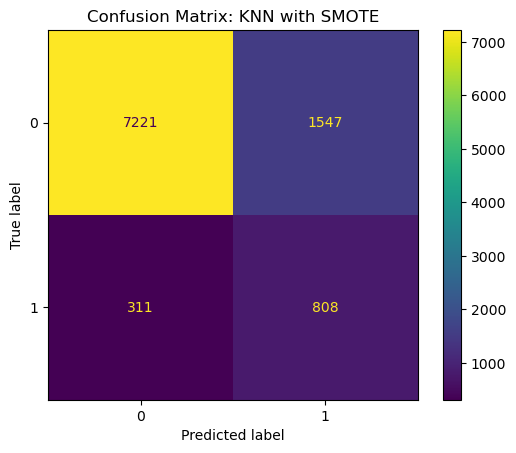

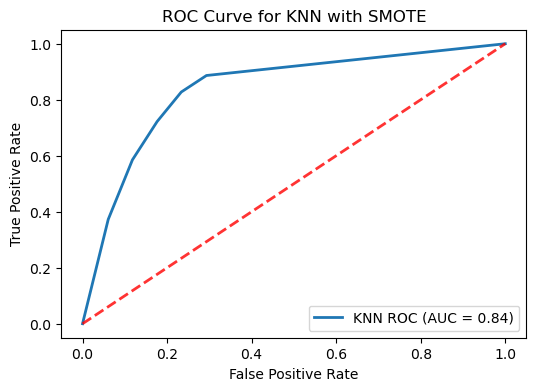

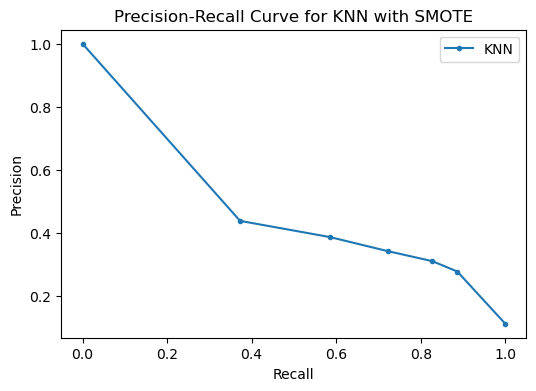

In [68]:
strategy_name = "SMOTE"
model = KNeighborsClassifier()
name = "KNN"

train_evaluate_plot_model(model, name, strategy_name, SMOTE(random_state=42))

### Naive Bayes

Test Accuracy for Naive Bayes: 0.6176
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      8768
           1       0.20      0.80      0.32      1119

    accuracy                           0.62      9887
   macro avg       0.58      0.70      0.53      9887
weighted avg       0.87      0.62      0.69      9887



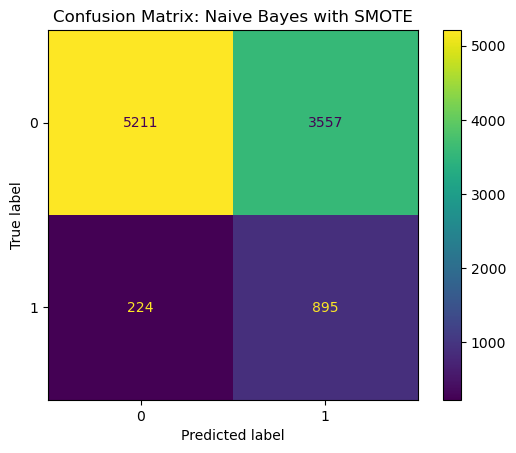

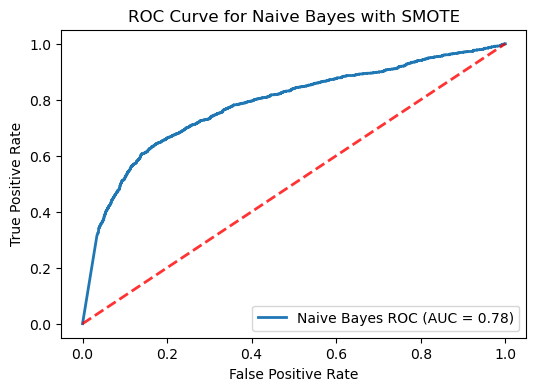

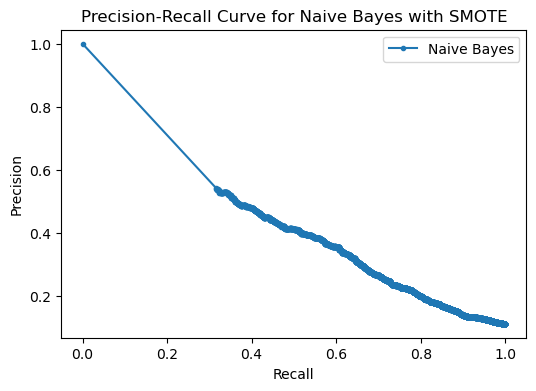

In [69]:
strategy_name = "SMOTE"
model = GaussianNB()
name = "Naive Bayes"

train_evaluate_plot_model(model, name, strategy_name, SMOTE(random_state=42))

### Decision Tree

Test Accuracy for Decision Tree: 0.8595
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8768
           1       0.40      0.50      0.44      1119

    accuracy                           0.86      9887
   macro avg       0.67      0.70      0.68      9887
weighted avg       0.87      0.86      0.87      9887



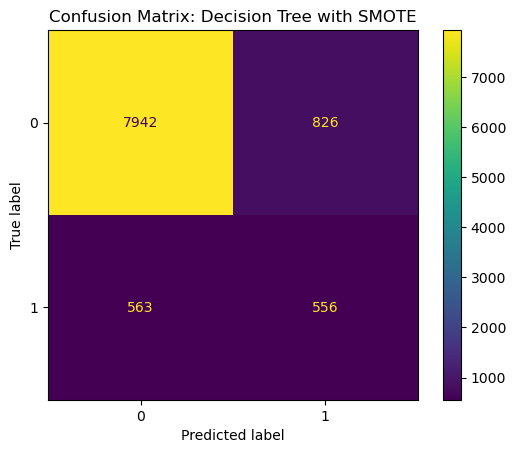

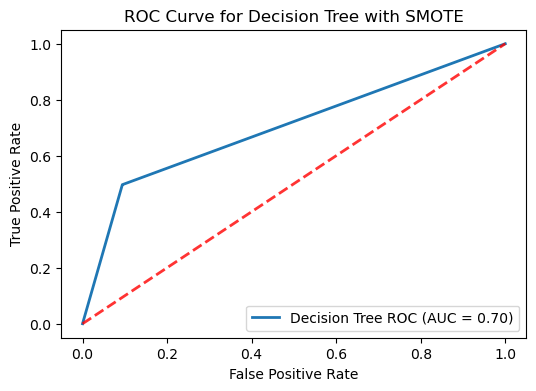

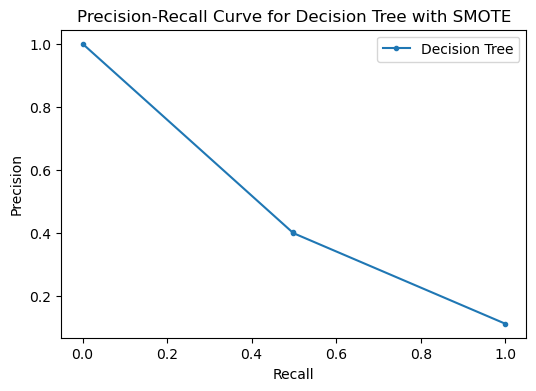

In [70]:
strategy_name = "SMOTE"
model = DecisionTreeClassifier()
name = "Decision Tree"

train_evaluate_plot_model(model, name, strategy_name, SMOTE(random_state=42))

### Random Forest

Test Accuracy for Random Forest: 0.8997
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8768
           1       0.56      0.50      0.53      1119

    accuracy                           0.90      9887
   macro avg       0.75      0.72      0.74      9887
weighted avg       0.89      0.90      0.90      9887



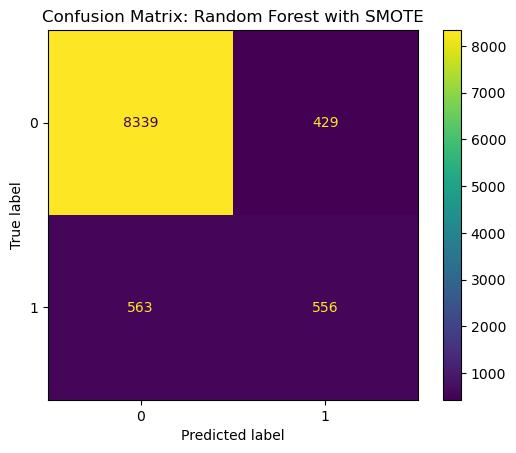

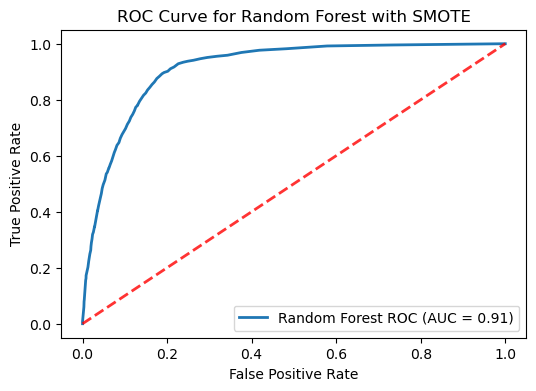

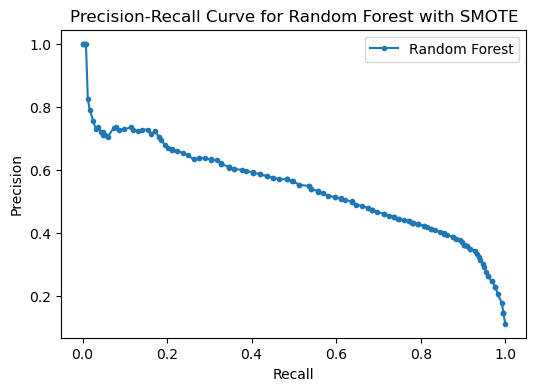

In [71]:
strategy_name = "SMOTE"
model = RandomForestClassifier()
name = "Random Forest"

train_evaluate_plot_model(model, name, strategy_name, SMOTE(random_state=42))

### SVM

Test Accuracy for SVM: 0.8654
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8768
           1       0.44      0.72      0.55      1119

    accuracy                           0.87      9887
   macro avg       0.70      0.80      0.73      9887
weighted avg       0.90      0.87      0.88      9887



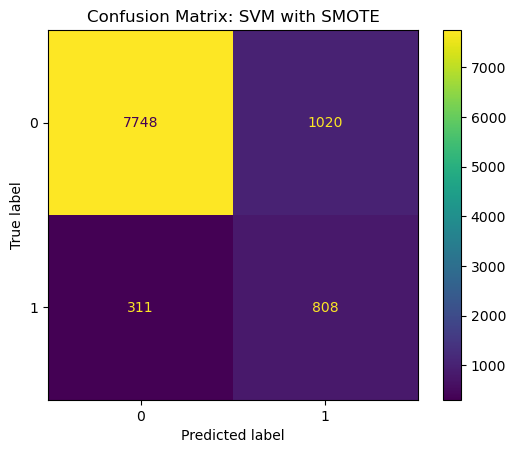

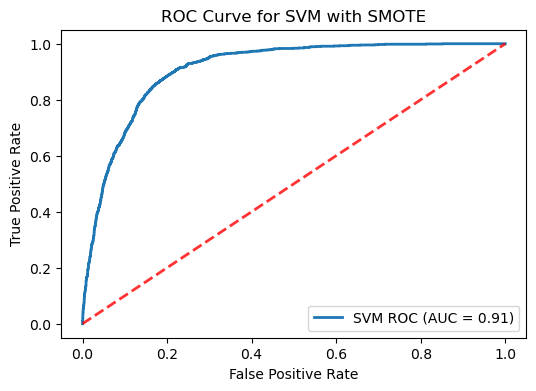

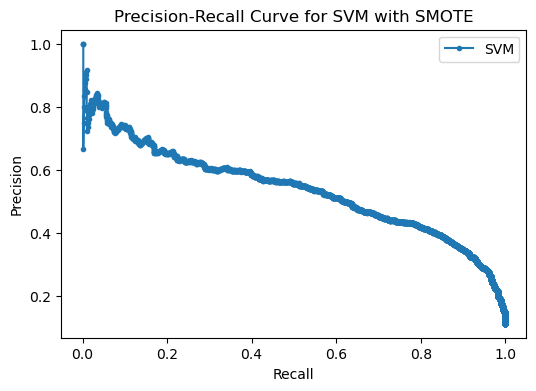

In [72]:
strategy_name = "SMOTE"
model = SVC(probability=True)
name = "SVM"

train_evaluate_plot_model(model, name, strategy_name, SMOTE(random_state=42))

### Linear Discriminant Analysis

Test Accuracy for Linear Discriminant Analysis: 0.8132
Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      8768
           1       0.36      0.83      0.50      1119

    accuracy                           0.81      9887
   macro avg       0.67      0.82      0.69      9887
weighted avg       0.90      0.81      0.84      9887



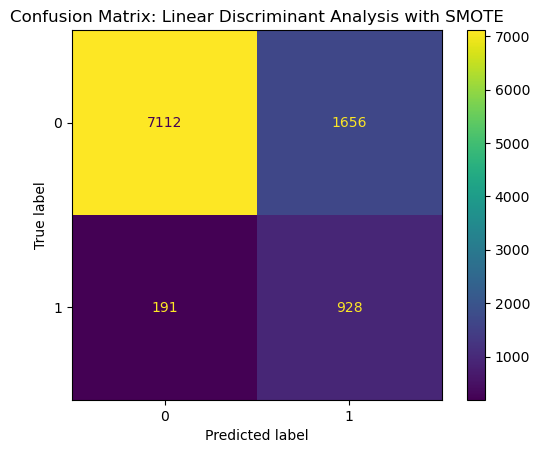

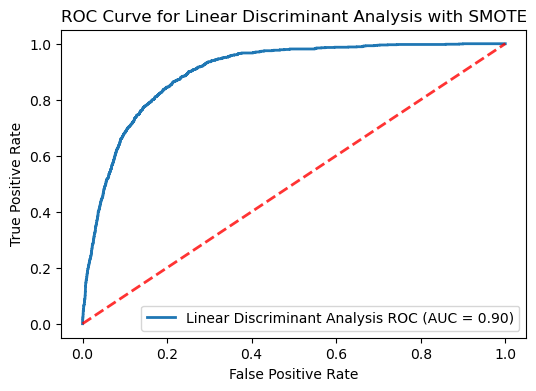

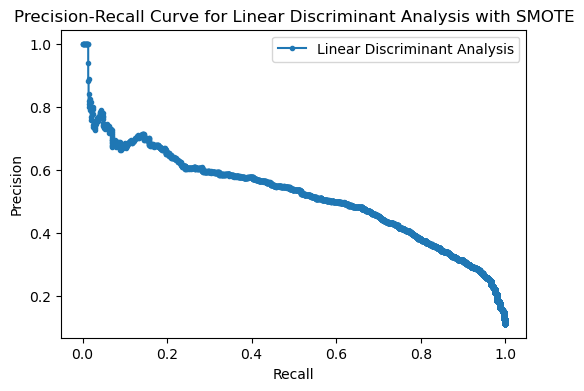

In [73]:
strategy_name = "SMOTE"
model = LinearDiscriminantAnalysis()
name = "Linear Discriminant Analysis"

train_evaluate_plot_model(model, name, strategy_name, SMOTE(random_state=42))